In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import os

In [2]:
from src.ket import Ket,Basis

In [3]:
import matplotlib.pyplot as plt
def disp_basis(basis):
    plt.imshow([[k.num for k in basis]], cmap = "coolwarm")
    plt.axis('off')

In [4]:
example_ket = Ket(int('0b0101', 2),4)
example_ket.data()

['0', '1', '0', '1']

In [5]:
print(example_ket)

|5,2:↓↑↓↑⟩


|num,energy subspace:qbit configuration⟩

A basis is a tuple of kets. There are very few safeties on this.

In [6]:
Basis([example_ket,example_ket,example_ket])

[5 5 5]

A better example might be

[0 1 2 3]


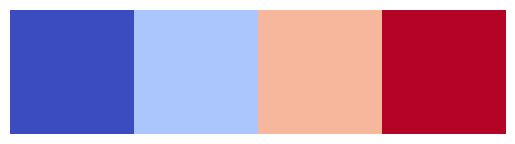

In [8]:
b = Basis([Ket(0,2),Ket(1,2),Ket(2,2),Ket(3,2)])
print(b)
disp_basis(b)

In [9]:
for k in b:
    print(k)

|0,0:↓↓⟩
|1,1:↓↑⟩
|2,1:↑↓⟩
|3,2:↑↑⟩


This basis is in "canonical" or "numerical" order.

In [10]:
from src.ket import canonical_basis

|0,0:↓↓↓⟩
|1,1:↓↓↑⟩
|2,1:↓↑↓⟩
|3,2:↓↑↑⟩
|4,1:↑↓↓⟩
|5,2:↑↓↑⟩
|6,2:↑↑↓⟩
|7,3:↑↑↑⟩


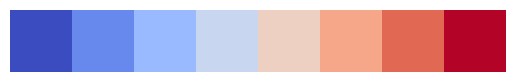

In [11]:
b = canonical_basis(3)
for k in b:
    print(k)
disp_basis(b)

Becouse we will be considering energy preserving unitaries it is also usefull to have states with the same energy grouped together. 

In [12]:
from src.ket import energy_basis

|0,0:↓↓↓⟩
|1,1:↓↓↑⟩
|2,1:↓↑↓⟩
|4,1:↑↓↓⟩
|3,2:↓↑↑⟩
|5,2:↑↓↑⟩
|6,2:↑↑↓⟩
|7,3:↑↑↑⟩
[0 1 2 4 3 5 6 7]


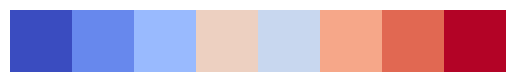

In [13]:
b = energy_basis(3)
for k in b:
    print(k)
print(b)
disp_basis(b)

In [14]:
print(energy_basis(7))
disp_basis(energy_basis(7))

[0 1 2 4 8 16 32 64 3 5 6 9 10 12 17 18 20 24 33 34 36 40 48 65 66 68 72 80 96 7 11 13 14 19 21 22 25 26 28 35 37 38 41 42 44 49 50 52 56 67 69 70 73 74 76 81 82 84 88 97 98 100 104 112 15 23 27 29 30 39 43 45 46 51 53 54 57 58 60 71 75 77 78 83 85 86 89 90 92 99 101 102 105 106 108 113 114 116 120 31 47 55 59 61 62 79 87 91 93 94 103 107 109 110 115 117 118 121 122 124 63 95 111 119 123 125 126 127]


we can also change basis just by reordering.

In [15]:
canonical_basis(3).reorder([0,1,2,4,3,5,6,7]) == energy_basis(3)

True

New basis can be created by tensoring two existing basis

In [16]:
b = canonical_basis(3).tensor(canonical_basis(3))
disp_basis(b)

In [17]:
b == canonical_basis(6)

True

A nice property of the numerical basis is that it is preserverd during tensor products. Where as the energy basis is broken.

In [18]:
b = energy_basis(3).tensor(energy_basis(3))
disp_basis(b)

In [19]:
b == energy_basis(6)

False